# STAT3612 Data Mining (2018-19 Semester 2)<a class="anchor" id="top">
## Tutorial Class 5 Regularization
### _Prepared by Dr. Gilbert Lui_

### Table of Contents:

* [Why Regularization?](#why)
* [Regularization of GLM](#RGLM)
    * [Shrinkage Methods](#shrinkage)
        * [Ridge Regression](#ridge)
        * [Lasso](#lasso)
        * [Elastic Net](#elastic)
    * [Model Selection Methods](#subset)
        * [Best Subset Selection Methods](#bestsub)
        * [Sequential Variable Selection Procedures](#seq)
* [Regularization of Regression Splines](#RSpline)
    * [Smoothing Spline](#sspline)
* [Piecewise Trend Filtering](#trend)
        

### Why Regularization?

1. Consider the GLM with $p$ inputs.
\begin{align}
g[E(Y|X=x)] = \beta_0 + \sum_{i=1}^p \beta_i x_i
\end{align}

    - When the number of inputs becomes larger,
        - parameter estimation could be unstable due to collinearity of inputs and hence ill-posed $(X'X)$.
        - model interpetation could be difficult due to large number of $\hat{\beta}_j$'s.
    - Two possible solutions are suggested here:
        - **shrinkage method**, the regression coefficients $\hat{\beta}_j$'s shrink towards zeros.
        - **subset selection method**, models of subset of inputs are selected (i.e. variable or model selection)


2. In the regression models with piecewise linear spline or B-spline, knot selection and the number of knots are essential.

    - When the number of knots is too many, the overfitting problem may occur.
    - When the locations of knots are incorrectly specified, the model fit will be deteriorated.
    
    - Typically, these two problems can be solved by **smoothing spline** simultaneiously.
        - the knots are placed at all data points of x.
        - overfitting can be controlled by shrinking the coefficients of the estimated function (in its basis expansion)

<div style="text-align: right"><a href="#top">Back to the top</a></div>

### Boston Dataset

The Boston data set contains 506 rows and 14 columns and the observations are stored in the data file `boston.csv`. The data file contains the following columns:

- `crim`: per capita crime rate by town.
- `zn`: proportion of residential land zoned for lots over 25,000 sq.ft.
- `indus`: proportion of non-retail business acres per town.
- `chas`: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).
- `nox`: nitrogen oxides concentration (parts per 10 million).
- `rm`: average number of rooms per dwelling.
- `age`: proportion of owner-occupied units built prior to 1940.
- `dis`: weighted mean of distances to five Boston employment centres.
- `rad`: index of accessibility to radial highways.
- `tax`: full-value property-tax rate per \$10,000.
- `ptratio`: pupil-teacher ratio by town.
- `black`: 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town.
- `lstat`: lower status of the population (percent).
- `medv`: median value of owner-occupied homes in \$1000s.

<div style="text-align: right"><a href="#top">Back to the top</a></div>

### Regularization of GLM<a class="anchor" id="RGLM"></a>

- In shrinkage methods, the sum of squared errors is minimized subject to the $\ell_2$-penality, $\ell_1$-penality or a mix of them.
    - For $\ell_2$-penality, the optimization problem is
    \begin{align}
    \min_\beta (y-X\beta)^T (y-X\beta) \hspace{4mm}\mbox{s.t.}\hspace{4mm} \sum_{i=0}^p \beta_i^2 \le t.
    \end{align}
    The resulting estimator $\hat \beta_\lambda = (X^TX + \lambda I)^{-1}X^Ty$ is called the **ridge regression** estimator.<br><br>
    - For $\ell_1$-penality, the optimization problem is
    \begin{align}
    \min_\beta (y-X\beta)^T (y-X\beta) \hspace{4mm}\mbox{s.t.}\hspace{4mm}\sum_{i=0}^p |\beta_i| \le t.
    \end{align}
    The resulting estimator is called the **LASSO regression** estimator.<br><br>
    - For the mix of $\ell_1$-penality and  $\ell_2$-penality, the optimization problem is
    \begin{align}
    \min_\beta (y-X\beta)^T (y-X\beta) \hspace{4mm}\mbox{s.t.}\hspace{4mm}\alpha\sum_{i=0}^p |\beta_i| + (1-\alpha)\sum_{i=0}^p \beta_i^2 \le t.
    \end{align}
    The resulting estimator is called the **elastic net** estimator.
        
Note that the above three penalties can also be implemented in the GLM framework, i.e., **the negative log-likelihood is minimized subject to the penalty constraint**.

- In subset selection methods,
    - a number of model selection criteria can be applied to select the best subset of input variables, e.g. Mallow's $C_p$, AIC and BIC.
    - sequential variable selection method (i.e. forward selection, backward elimination and stepwise selection) can be implemented to select into (or eliminate from) the regression model.

<div style="text-align: right"><a href="#top">Back to the top</a></div>

### Shrinkage Methods<a class="anchor" id="shrinkage"></a>

#### Ridge Regression <a class="anchor" id="ridge"></a>

Using the boston data set, a ridge regression model is considered for `medv` and all other variables in the data set are the input variables. Typically, the function `Ridge()` is used for this purpose. The effect of regularization parameter $\lambda$ on the estimated coefficients is given below:

Text(0.5, 1.0, 'Mean squared error as a function of the regularization')

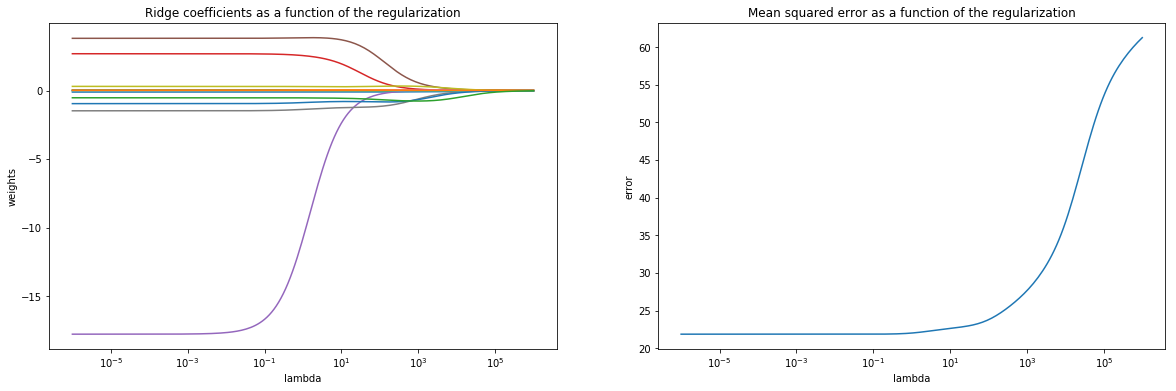

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
from sklearn.linear_model import RidgeCV, Ridge
from sklearn.metrics import mean_squared_error

boston = pd.read_csv("boston.csv")

varlist = list(boston.columns)
y = boston[varlist[-1]]
x = boston[varlist[:-1]]

alphas = np.logspace(-6, 6, 200)
coefs = []
error = []
for a in alphas:
    ridge = Ridge(alpha=a)
    ridge.fit(x, y)
    coefs.append(ridge.coef_)
    error.append(mean_squared_error(y, ridge.predict(x)))

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20,6))
ax[0].plot(alphas, coefs)
ax[0].set_xscale('log')
#ax[0].set_xlim(ax.get_xlim()[::-1])  # reverse axis
ax[0].set_xlabel('lambda')
ax[0].set_ylabel('weights')
ax[0].set_title('Ridge coefficients as a function of the regularization')
ax[1].plot(alphas, error)
ax[1].set_xscale('log')
ax[1].set_xlabel('lambda')
ax[1].set_ylabel('error')
ax[1].set_title('Mean squared error as a function of the regularization')

If the regularization parameter $\lambda$ is selected by the cross-validation method, the function `RidgeCV()` can be used.

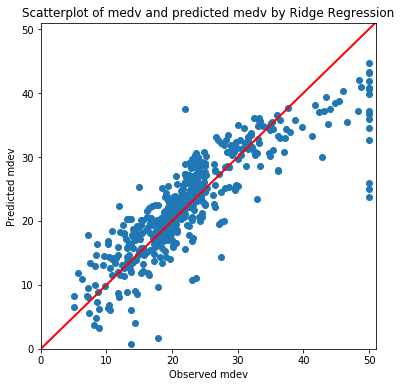

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
from sklearn.linear_model import RidgeCV, Ridge
from sklearn.metrics import mean_squared_error

boston = pd.read_csv("boston.csv")

varlist = list(boston.columns)
y = boston[varlist[-1]]
x = boston[varlist[:-1]]

alphas = np.linspace(.00001, 2, 500)
# By default, n-folded cross-validation is used.
ridgereg = RidgeCV(alphas=alphas, scoring='neg_mean_squared_error', normalize=True)
ridgereg.fit(x, y)
linreg_ridge = Ridge(alpha=ridgereg.alpha_)
linreg_ridge.fit(x, y)
new_str = 'ypred'
newdat = pd.DataFrame({'medv':y})
newdat[new_str] = linreg_ridge.predict(x)
newdat = newdat.sort_values('medv')
 
plt.figure(1, figsize=(6,6))
plt.title("Scatterplot of medv and predicted medv by Ridge Regression")
plt.ylabel("Predicted mdev")
plt.xlabel("Observed mdev")
plt.xlim([0,51])
plt.ylim([0,51])
plt.scatter(y=newdat["ypred"].values, x=newdat["medv"].values)
plt.plot([0,51], [0,51], "r-", linewidth=2)

In [3]:
print("Lambda =",ridgereg.alpha_)
print("Coeff. =", linreg_ridge.intercept_, linreg_ridge.coef_)
print("MSE =", mean_squared_error(y, linreg_ridge.predict(x)))

Lambda = 0.008025991983967935
Coeff. = 36.39426022759193 [-1.07965568e-01  4.64332488e-02  2.01708310e-02  2.68534928e+00
 -1.76746215e+01  3.81059010e+00  6.10354815e-04 -1.47421140e+00
  3.05833382e-01 -1.23418759e-02 -9.51726877e-01  9.31648123e-03
 -5.24860005e-01]
MSE = 21.894857033566137


<div style="text-align: right"><a href="#top">Back to the top</a></div>

#### LASSO<a class="anchor" id="lasso"></a>

Using the boston data set, a Lasso regression model is considered for `medv` and all other variables in the data set are the input variables. Typically, the function `Lasso()` is used for this purpose. The effect of regularization parameter $\lambda$ on the estimated coefficients is given below:

Text(0.5, 1.0, 'Mean squared error as a function of the regularization')

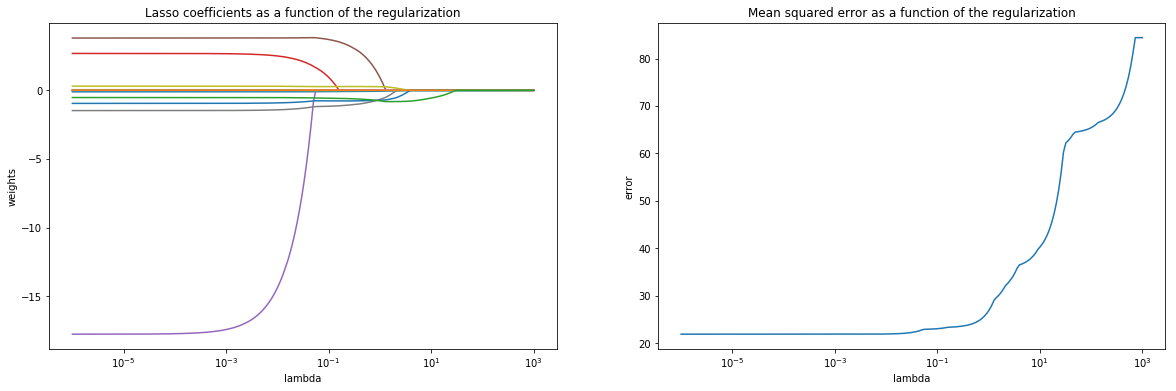

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
from sklearn.linear_model import LassoCV, Lasso
from sklearn.metrics import mean_squared_error

boston = pd.read_csv("boston.csv")

varlist = list(boston.columns)
y = boston[varlist[-1]]
x = boston[varlist[:-1]]

alphas = np.logspace(-6, 3, 200)
coefs = []
error = []
for a in alphas:
    lasso = Lasso(alpha=a)
    lasso.fit(x, y)
    coefs.append(lasso.coef_)
    error.append(mean_squared_error(y, lasso.predict(x)))

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20,6))
ax[0].plot(alphas, coefs)
ax[0].set_xscale('log')
#ax[0].set_xlim(ax.get_xlim()[::-1])  # reverse axis
ax[0].set_xlabel('lambda')
ax[0].set_ylabel('weights')
ax[0].set_title('Lasso coefficients as a function of the regularization')
ax[1].plot(alphas, error)
ax[1].set_xscale('log')
ax[1].set_xlabel('lambda')
ax[1].set_ylabel('error')
ax[1].set_title('Mean squared error as a function of the regularization')

Similar to the ridge regression, if the regularization parameter $\lambda$ is selected by the cross-validation method, the function `LassoCV()` can be used.

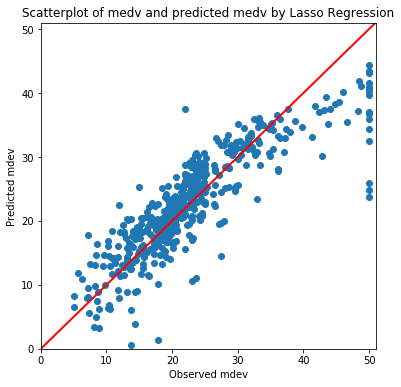

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
from sklearn.linear_model import RidgeCV, Ridge
from sklearn.metrics import mean_squared_error

boston = pd.read_csv("boston.csv")

varlist = list(boston.columns)
y = boston[varlist[-1]]
x = boston[varlist[:-1]]

alphas = np.linspace(.00001, 2, 500)
# 5-folded cross-validation is used here.
lassoreg = LassoCV(alphas=alphas, cv=5, normalize=True)
lassoreg.fit(x, y)
linreg_lasso = Lasso(alpha=lassoreg.alpha_)
linreg_lasso.fit(x, y)
new_str = 'ypred'
newdat = pd.DataFrame({'medv':y})
newdat[new_str] = linreg_lasso.predict(x)
newdat = newdat.sort_values('medv')
 
plt.figure(1, figsize=(6,6))
plt.title("Scatterplot of medv and predicted medv by Lasso Regression")
plt.ylabel("Predicted mdev")
plt.xlabel("Observed mdev")
plt.xlim([0,51])
plt.ylim([0,51])
plt.scatter(y=newdat["ypred"].values, x=newdat["medv"].values)
plt.plot([0,51], [0,51], "r-", linewidth=2)

In [6]:
print("Lambda =",lassoreg.alpha_)
print("Coeff. =", linreg_lasso.intercept_, linreg_lasso.coef_)
print("MSE =", mean_squared_error(y, linreg_lasso.predict(x)))

Lambda = 0.008025991983967935
Coeff. = 34.66181427501759 [-1.06580138e-01  4.67733727e-02  9.25569290e-03  2.54022289e+00
 -1.50601053e+01  3.81333543e+00 -1.32277724e-03 -1.43269568e+00
  3.00011141e-01 -1.25695666e-02 -9.23550232e-01  9.45117279e-03
 -5.29351802e-01]
MSE = 21.918372344232022


<div style="text-align: right"><a href="#top">Back to the top</a></div>

#### Elastic Net<a class="anchor" id="elastic"></a>

Using the boston data set, an elastic net regression model is considered for `medv` and all other variables in the data set are the input variables. Typically, the function `ElasticNet()` is used for this purpose. The weights of $\ell_1$ and $\ell_2$ penalties are controlled by the input argument `l1_ratio=` whose default value is 0.5, i.e., they are equally weighted. The effect of regularization parameter $\lambda$ on the estimated coefficients is given below:

Text(0.5, 1.0, 'Mean squared error as a function of the regularization')

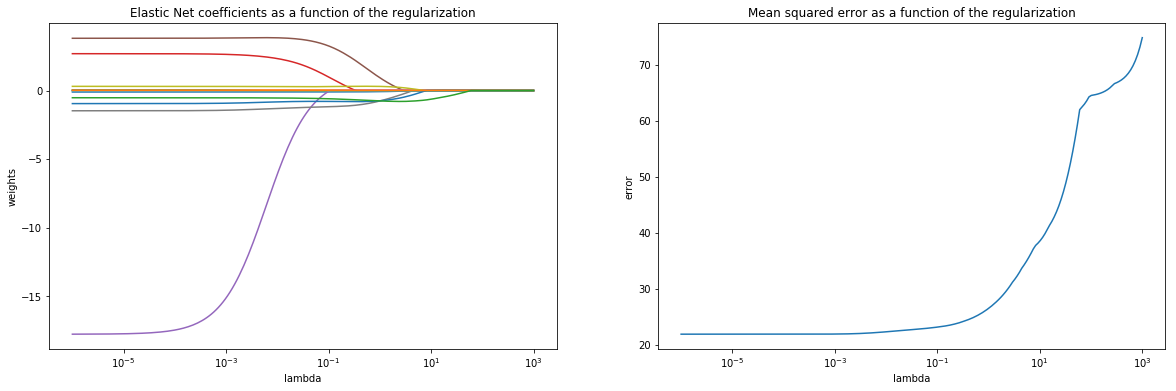

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
from sklearn.linear_model import ElasticNetCV, ElasticNet
from sklearn.metrics import mean_squared_error

boston = pd.read_csv("boston.csv")

varlist = list(boston.columns)
y = boston[varlist[-1]]
x = boston[varlist[:-1]]

alphas = np.logspace(-6, 3, 200)
coefs = []
error = []
for a in alphas:
    enet = ElasticNet(alpha=a)
    enet.fit(x, y)
    coefs.append(enet.coef_)
    error.append(mean_squared_error(y, enet.predict(x)))

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20,6))
ax[0].plot(alphas, coefs)
ax[0].set_xscale('log')
#ax[0].set_xlim(ax.get_xlim()[::-1])  # reverse axis
ax[0].set_xlabel('lambda')
ax[0].set_ylabel('weights')
ax[0].set_title('Elastic Net coefficients as a function of the regularization')
ax[1].plot(alphas, error)
ax[1].set_xscale('log')
ax[1].set_xlabel('lambda')
ax[1].set_ylabel('error')
ax[1].set_title('Mean squared error as a function of the regularization')

Similar to the ridge regression and Lasso regression, if the regularization parameter $\lambda$ is selected by the cross-validation method, the function `ElasticNetCV()` can be used.

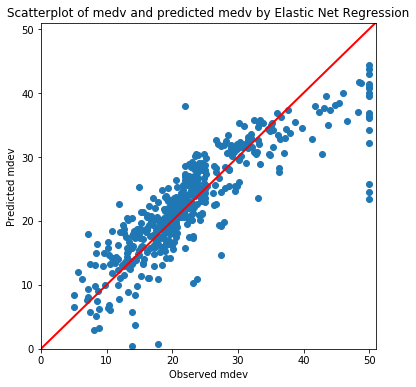

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
from sklearn.linear_model import ElasticNetCV, ElasticNet
from sklearn.metrics import mean_squared_error

boston = pd.read_csv("boston.csv")

varlist = list(boston.columns)
y = boston[varlist[-1]]
x = boston[varlist[:-1]]

alphas = np.linspace(.00001, 2, 500)
# 5-folded cross-validation is used here.
enetreg = ElasticNetCV(alphas=alphas, cv=5, normalize=True)
enetreg.fit(x, y)
linreg_enet = ElasticNet(alpha=enetreg.alpha_)
linreg_enet.fit(x, y)
new_str = 'ypred'
newdat = pd.DataFrame({'medv':y})
newdat[new_str] = linreg_enet.predict(x)
newdat = newdat.sort_values('medv')
 
plt.figure(1, figsize=(6,6))
plt.title("Scatterplot of medv and predicted medv by Elastic Net Regression")
plt.ylabel("Predicted mdev")
plt.xlabel("Observed mdev")
plt.xlim([0,51])
plt.ylim([0,51])
plt.scatter(y=newdat["ypred"].values, x=newdat["medv"].values)
plt.plot([0,51], [0,51], "r-", linewidth=2)

In [9]:
print("Lambda =",enetreg.alpha_)
print("Coeff. =", linreg_enet.intercept_, linreg_enet.coef_)
print("MSE =", mean_squared_error(y, linreg_enet.predict(x)))

Lambda = 0.004017995991983967
Coeff. = 31.296745078235016 [-1.04331760e-01  4.75163372e-02 -1.04589333e-02  2.51656498e+00
 -1.03023322e+01  3.85260220e+00 -5.73458102e-03 -1.36459493e+00
  2.89230563e-01 -1.29655306e-02 -8.71105488e-01  9.69803195e-03
 -5.34366374e-01]
MSE = 22.065881146936892


<div style="text-align: right"><a href="#top">Back to the top</a></div>

### Model Selection Methods<a class="anchor" id="subset"></a>

### Best Subset Selection Methods<a class="anchor" id="bestsub"></a>

In the following illustration, the best subset selection method is implemented by selection of the best model by $R^2$ for every $k$, the number of predictors in the model. Then, the finalized best model wil be chosen by the smallest value of BIC over $k$.

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import itertools as it
from statsmodels.regression.linear_model import OLS

boston = pd.read_csv("boston.csv")

varlist = list(boston.columns)
y = boston[varlist[-1]]
x = boston[varlist[:-1]]

### Best Subset Selection
min_score = 1e10 # set some initial large value for min BIC score
best_subset = [] # best subset of predictors

# Generate all possible subsets of the set of 13 predictors
kmax = x.columns.shape[0]
varlist = list(x.columns)
predictor_set = set(range(kmax)) # predictor set = {0,1,2,3,4,5,6,7,8,9,10,11,12}

# Repeat for every possible size of subset
print('Best subset of k variables by exhaustive search:')
for size_k in range(kmax): 
    # Generate all possible subsets of size 'size', 
    # using the 'combination' function from the 'itertools' library
    # collection of tuples of column numbers with fixed size_k + 1
    subsets_of_size_k = it.combinations(predictor_set, size_k + 1) 
    
    max_rsq = -1e10 # set some initial small value for max R^2 score
    best_k_subset = [] # best subset of predictors of size k
    
    # Iterate over all subsets of our predictor set
    for predictor_subset in subsets_of_size_k:    
        # Use only a subset of predictors in the data
        x_subset = x.iloc[:,list(predictor_subset)]

        # Fit and evaluate R^2
        model = OLS(y, x_subset)
        results = model.fit()
        r_squared = results.rsquared
        
        # Update max R^2 and best predictor subset of size k
        # If current predictor subset has a higher R^2 score than that of the best subset 
        # we've found so far, remember the current predictor subset as the best!
        if(r_squared > max_rsq): 
            max_rsq = r_squared
            best_k_subset = predictor_subset[:]             

    # Use only the best subset of size k for the predictors
    x_subset = x.iloc[:, list(best_k_subset)]
        
    # Fit and evaluate BIC of the best subset of size k
    model = OLS(y, x_subset)
    results = model.fit()
    bic = results.bic

    print('k={},'.format(size_k+1), [varlist[i] for i in sorted(list(best_k_subset))])
    # Update minimum BIC and best predictor subset
    # If current predictor has a lower BIC score than that of the best subset 
    # we've found so far, remember the current predictor as the best!
    if(bic < min_score): 
        min_score = bic
        best_subset = best_k_subset[:]
    
print('Best subset by exhaustive search:')
print([varlist[i] for i in sorted(list(best_subset))])

Best subset of k variables by exhaustive search:
k=1, ['rm']
k=2, ['rm', 'lstat']
k=3, ['rm', 'ptratio', 'lstat']
k=4, ['rm', 'ptratio', 'b', 'lstat']
k=5, ['rm', 'dis', 'ptratio', 'b', 'lstat']
k=6, ['chas', 'rm', 'dis', 'ptratio', 'b', 'lstat']
k=7, ['zn', 'chas', 'rm', 'dis', 'ptratio', 'b', 'lstat']
k=8, ['crim', 'zn', 'chas', 'rm', 'dis', 'ptratio', 'b', 'lstat']
k=9, ['zn', 'chas', 'rm', 'dis', 'rad', 'tax', 'ptratio', 'b', 'lstat']
k=10, ['crim', 'zn', 'chas', 'rm', 'dis', 'rad', 'tax', 'ptratio', 'b', 'lstat']
k=11, ['crim', 'zn', 'chas', 'nox', 'rm', 'dis', 'rad', 'tax', 'ptratio', 'b', 'lstat']
k=12, ['crim', 'zn', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 'b', 'lstat']
k=13, ['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 'b', 'lstat']
Best subset by exhaustive search:
['crim', 'zn', 'chas', 'rm', 'dis', 'ptratio', 'b', 'lstat']


<div style="text-align: right"><a href="#top">Back to the top</a></div>

### Sequential Variable Selection  Methods<a class="anchor" id="seq"></a>

In the following, the sequential variable selection procedures are illustrated. Basically, the codes for `forw_reg()`, `back_reg()` and `step_reg()` followed from the package `stepwise-regression` in which the packages `pandas` and `statsmodels.api` are pre-loaded in advance.

#### Forward Selection

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
from stepwise import forw_reg

boston = pd.read_csv("boston.csv")

varlist = list(boston.columns)
y = boston[varlist[-1]]
x = boston[varlist[:-1]]

result = forw_reg(x, y, sle=0.1)
print('resulting features:', result)

D:\anaconda3\envs\keras\lib\site-packages\numpy\core\fromnumeric.py:2223: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


resulting features: ['lstat', 'rm', 'ptratio', 'dis', 'nox', 'chas', 'b', 'zn', 'crim', 'rad', 'tax']


#### Backward Elimination

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from stepwise import back_reg

boston = pd.read_csv("boston.csv")

varlist = list(boston.columns)
y = boston[varlist[-1]]
x = boston[varlist[:-1]]

result = back_reg(x, y, sls=0.1)
print('resulting features:', result)

resulting features: ['crim', 'zn', 'chas', 'nox', 'rm', 'dis', 'rad', 'tax', 'ptratio', 'b', 'lstat']


#### Stepwise Regression

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from stepwise import step_reg

boston = pd.read_csv("boston.csv")

varlist = list(boston.columns)
y = boston[varlist[-1]]
x = boston[varlist[:-1]]

result = step_reg(x, y, sle=0.1, sls=0.2)
print('resulting features:', result)

resulting features: ['lstat', 'rm', 'ptratio', 'dis', 'nox', 'chas', 'b', 'zn', 'crim', 'rad', 'tax']


<div style="text-align: right"><a href="#top">Back to the top</a></div>

### Regularization of Regression Spline<a class="anchor" id="RSpline"></a>

- The problems of regression splines can be solved by the smoothing splines automatically by

    - regularized regression over the natural spline basis
    - using all data points of $x$ as knots
- Originally, the **smoothing spline** is the estimation of function $f(x)$ by minimizing the following sum of squared errors subject to the penalty (roughness) constraint.
\begin{align}
\min_{f \in \mathcal{H}} \sum_{i=1}^n [y-f(x)]^2 + \lambda \int |f^{\prime\prime}(u)|^2 du,
\end{align}
where $\mathcal{H}$ denotes the second order Sobolev space.<br><br>
- By expressing $f(x)=\phi(x)^T \beta$ through the use of B-splines bases, the minimization problem can be written as
\begin{align}
\min_\beta (y-\Phi\beta)^T(y-\Phi\beta) + \lambda \beta^T \Omega \beta,
\end{align}
where $\Phi$ denotes the data matrix constructed by bases $\phi(x)$'s and $\Omega_{ij} = \int \ddot{\phi}_i(x)\ddot{\phi}_j(x)dx$.<br><br>
- The resulting estimator of $\beta$ is the **generalized ridge estimator**
\begin{align}
\hat \beta_\lambda = (\Phi^T \Phi + \lambda \Omega)^{-1} (\Phi^T y).
\end{align}
-  Typically, the parameter $\lambda$ in the generalized ridge estimator is estimated by generalized cross-validation (GCV).

#### Smoothing Spline<a class="anchor" id="sspline"></a>

To implement smoothing spline in Python, the simplest approach would be the package `pygam`. Some may want to use `scipy.interpolate.UnivariateSpline`. However, this approach does not provide the CV and even GCV method to estimate the smoothing penalty parameter.

In the following example, the smoothing spline function is estimated by choosing smoothing penalty parameter by GCV method. 

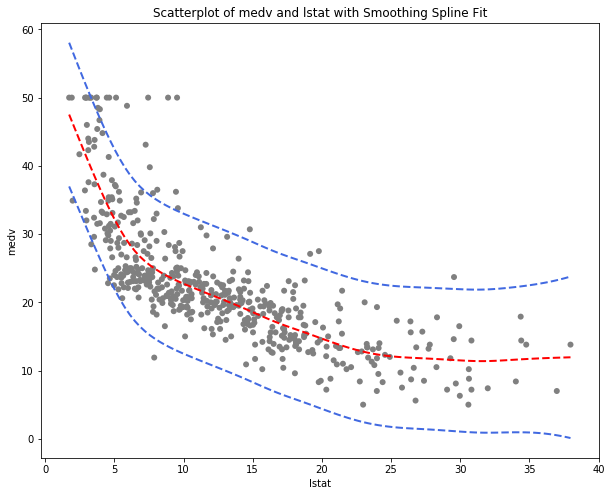

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
from pygam import LinearGAM, s

boston = pd.read_csv("boston.csv")

varlist = list(boston.columns)
y = boston[varlist[-1]]
#x = boston[varlist[:-1]]
x = boston['lstat']
y = y.to_frame().values
x = x.to_frame().values

lams = np.exp(np.random.rand(100,1)*8-3)
gam = LinearGAM(s(0)).gridsearch(x,y, lam=lams, progress=False)
#gam.summary()
xx = gam.generate_X_grid(term=0)
plt.figure(figsize=(10,8))
plt.title("Scatterplot of medv and lstat with Smoothing Spline Fit")
plt.ylabel("medv")
plt.xlabel("lstat")
plt.plot(xx, gam.predict(xx), "r--", linewidth=2)
plt.plot(xx, gam.prediction_intervals(xx, width=.95), color="royalblue", ls='--', linewidth=2)
plt.scatter(x,y, facecolor='gray', edgecolor='none')

In [15]:
gam.summary()

LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                      8.2402
Link Function:                     IdentityLink Log Likelihood:                                 -2143.2804
Number of Samples:                          506 AIC:                                             4305.0412
                                                AICc:                                            4305.4229
                                                GCV:                                               27.8918
                                                Scale:                                             27.0754
                                                Pseudo R-Squared:                                   0.6845
Feature Function                  Lam

D:\anaconda3\envs\keras\lib\site-packages\ipykernel_launcher.py:1: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  """Entry point for launching an IPython kernel.


<div style="text-align: right"><a href="#top">Back to the top</a></div>

### Piecewise Trend Filtering<a class="anchor" id="trend"></a>

- Smoothing spline is a non-parametric regression technique to extract the conditional mean component of y given x.
- Alternatively, piecewise trend filtering is capable of handling similar task.

To illustrate the piecewise trend filtering methods, the dataset of bitcoin price in Assignment 1 will be used.

#### HPTrend Filtering ($\ell_2$ Trend Filtering)

The following HP filtering is obtained under the default setting of $\lambda$, which is 1600, in the `statsmodels` package.

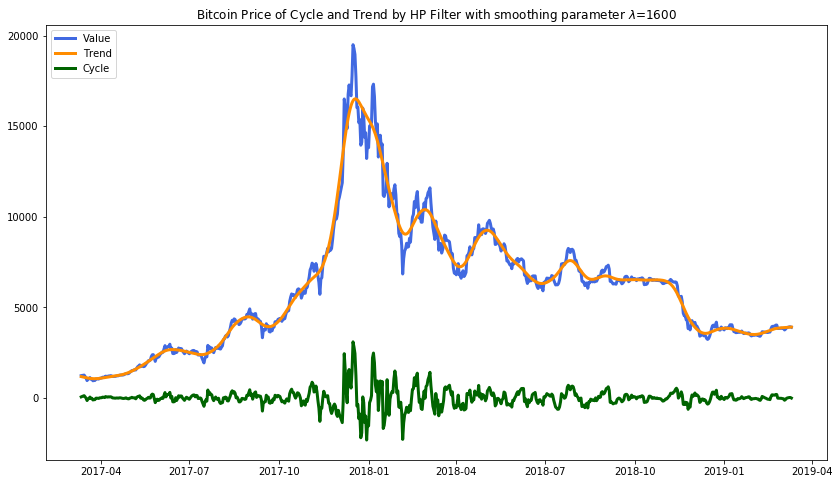

In [16]:
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sm

bitcon = pd.read_csv("bitcoin.csv", 
                     header=None, 
                     names=['date', 'price'])
x = bitcon.index.values
x.shape = (x.shape[0],1)
y = bitcon.price.values
y.shape = (y.shape[0],1)
dt = [datetime.strptime(bitcon.date[j], '%Y-%m-%d %H:%M:%S').date() for j in range(bitcon.date.shape[0])]

y_cycle, y_trend = sm.tsa.filters.hpfilter(y)

fig, ax = plt.subplots(figsize=(14,8))
p = [ax.plot(dt, y, 'royalblue', linewidth=3, label="Value"),
     ax.plot(dt, y_trend, "darkorange", linewidth=3, label="Trend"),
     ax.plot(dt, y_cycle, "darkgreen", linewidth=3, label="Cycle")]
ax.set_title('Bitcoin Price of Cycle and Trend by HP Filter with smoothing parameter $\lambda$=1600')
ax.format_xdata = mdates.DateFormatter('%Y-%m')
ax.legend(loc=2)

Hodrick and Prescott (1997) suggested 1600 as a value for $\lambda$ for quarterly data. Ravn and Uhlig (2002) suggest that the value of $\lambda$ depends on the observed frequency of the data. In particular, the $\lambda$ for monthly data is $12^4 \times 6.25$ where $12$ is the data frequency and $6.25$ is the $\lambda$ for annual data. Therefore, for daily data, the value of $\lambda$ is $365^4 \times 6.25 = 110930628906.25$.

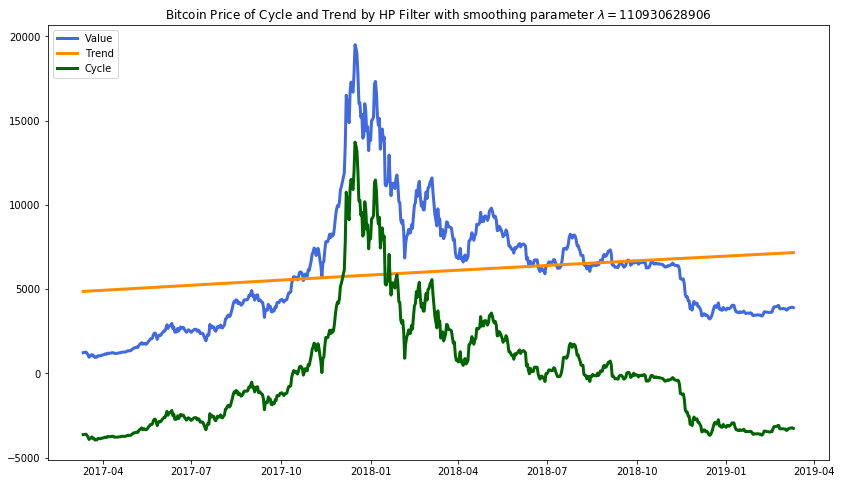

In [17]:
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sm

bitcon = pd.read_csv("bitcoin.csv", 
                     header=None, 
                     names=['date', 'price'])
x = bitcon.index.values
x.shape = (x.shape[0],1)
y = bitcon.price.values
y.shape = (y.shape[0],1)
dt = [datetime.strptime(bitcon.date[j], '%Y-%m-%d %H:%M:%S').date() for j in range(bitcon.date.shape[0])]

lamb=365**4 * 6.25
y_cycle, y_trend = sm.tsa.filters.hpfilter(y, lamb=lamb)

fig, ax = plt.subplots(figsize=(14,8))
p = [ax.plot(dt, y, 'royalblue', linewidth=3, label="Value"),
     ax.plot(dt, y_trend, "darkorange", linewidth=3, label="Trend"),
     ax.plot(dt, y_cycle, "darkgreen", linewidth=3, label="Cycle")]
ax.set_title('Bitcoin Price of Cycle and Trend by HP Filter with smoothing parameter $\lambda=${}'.format(int(lamb)))
ax.format_xdata = mdates.DateFormatter('%Y-%m')
ax.legend(loc=2)

#### $\ell_1$ Trend Filtering

The codes of $\ell_1$ trend filtering are adopted from the github site of Bugra Akyildiz who presented his results in pydata conference in 2015. All the codes can be found from the modules `tf.py` and `algos.py`.

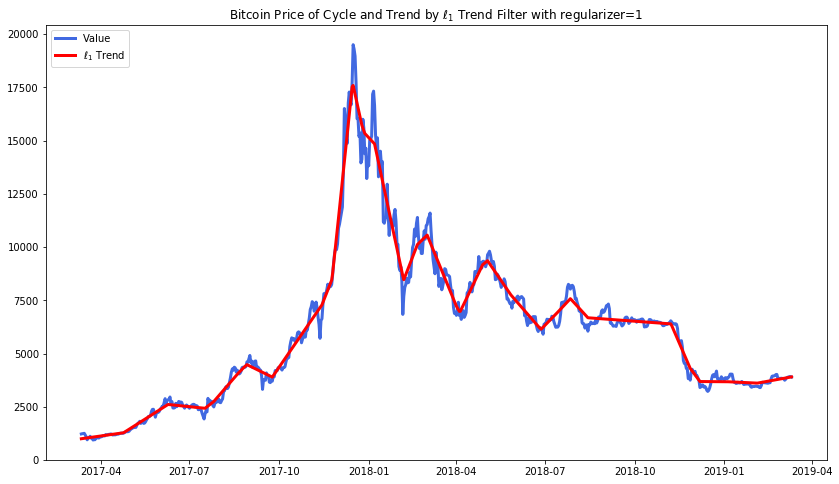

In [18]:
from tf import l1, strip_outliers
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
%matplotlib inline

bitcon = pd.read_csv("bitcoin.csv", 
                     header=None, 
                     names=['date', 'price'])
x = bitcon.index.values
x.shape = (x.shape[0],1)
y = bitcon.price.values
y.shape = (y.shape[0],1)
dt = [datetime.strptime(bitcon.date[j], '%Y-%m-%d %H:%M:%S').date() for j in range(bitcon.date.shape[0])]

regularizer = 1
y_tf = l1(y, regularizer)

fig, ax = plt.subplots(figsize=(14,8))
p = [ax.plot(dt, y, 'royalblue', linewidth=3, label="Value"),
     ax.plot(dt, y_tf, "red", linewidth=3, label="$\ell_1$ Trend")]
ax.set_title('Bitcoin Price of Cycle and Trend by $\ell_1$ Trend Filter with regularizer={}'.format(int(regularizer)))
ax.format_xdata = mdates.DateFormatter('%Y-%m')
ax.legend(loc=2)

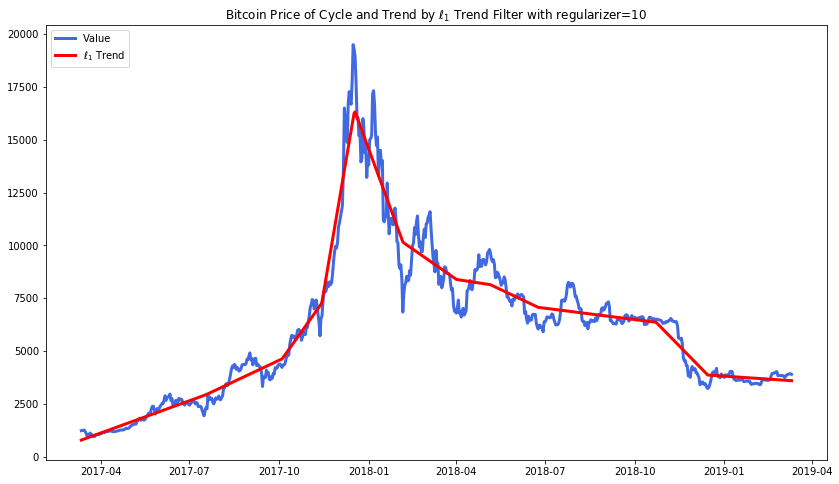

In [19]:
from tf import l1, strip_outliers
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
%matplotlib inline

bitcon = pd.read_csv("bitcoin.csv", 
                     header=None, 
                     names=['date', 'price'])
x = bitcon.index.values
x.shape = (x.shape[0],1)
y = bitcon.price.values
y.shape = (y.shape[0],1)
dt = [datetime.strptime(bitcon.date[j], '%Y-%m-%d %H:%M:%S').date() for j in range(bitcon.date.shape[0])]

regularizer = 10
y_tf = l1(y, regularizer)

fig, ax = plt.subplots(figsize=(14,8))
p = [ax.plot(dt, y, 'royalblue', linewidth=3, label="Value"),
     ax.plot(dt, y_tf, "red", linewidth=3, label="$\ell_1$ Trend")]
ax.set_title('Bitcoin Price of Cycle and Trend by $\ell_1$ Trend Filter with regularizer={}'.format(int(regularizer)))
ax.format_xdata = mdates.DateFormatter('%Y-%m')
ax.legend(loc=2)

In the following, the regularization parameter is determined by the minimum BIC.

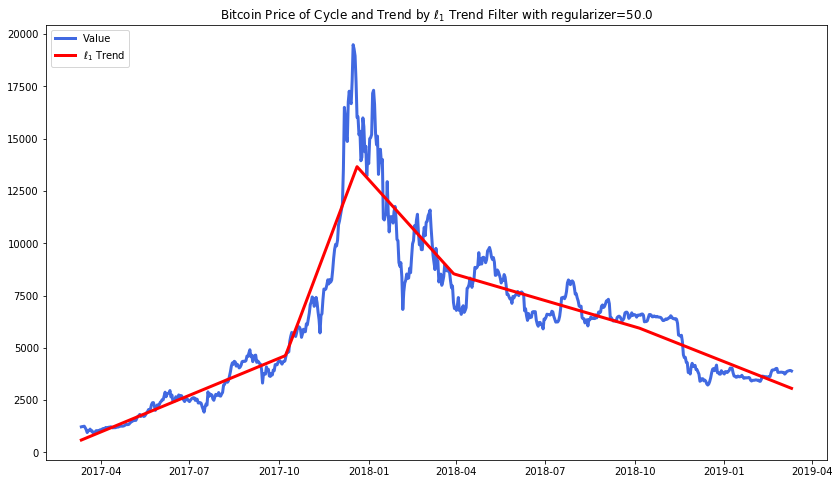

In [20]:
from tf import l1, strip_outliers
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
%matplotlib inline

bitcon = pd.read_csv("bitcoin.csv", 
                     header=None, 
                     names=['date', 'price'])
x = bitcon.index.values
x.shape = (x.shape[0],1)
y = bitcon.price.values
y.shape = (y.shape[0],1)
dt = [datetime.strptime(bitcon.date[j], '%Y-%m-%d %H:%M:%S').date() for j in range(bitcon.date.shape[0])]

n = y.shape[0]
regs = np.linspace(1,50,num=200)
bic = np.empty(regs.size)
j = 0
for i in regs:
    y_tf = l1(y, i)
    sse = np.sum((y-y_tf)**2)
    bic[j] = n*np.log(sse/n) + n*np.log(n)
    j = j + 1

regularizer = regs[np.argmin(bic)] 
y_tf = l1(y, regularizer)
fig, ax = plt.subplots(figsize=(14,8))
p = [ax.plot(dt, y, 'royalblue', linewidth=3, label="Value"),
     ax.plot(dt, y_tf, "red", linewidth=3, label="$\ell_1$ Trend")]
ax.set_title('Bitcoin Price of Cycle and Trend by $\ell_1$ Trend Filter with regularizer={}'.format(regularizer))
ax.format_xdata = mdates.DateFormatter('%Y-%m')
ax.legend(loc=2)